# Importing and Reading the Las File.

In [1]:
import lasio

las = lasio.read('PP_Well.las')

print(las)

print(las.keys())

['DEPTH', 'DT', 'GR', 'NPHI', 'RD', 'RHOB']


In [2]:
print(las.curves)

Mnemonic  Unit  Value  Description          
--------  ----  -----  -----------          
DEPTH     M            Depth                
DT        US/F         Sonic       Sonic    
GR        GAPI         GammaRay             
NPHI      V/V          Neutron     Neutron  
RD        OHMM         DeepRes     DeepRes  
RHOB      G/C3         Density     Density  


In [3]:
las.data.shape

(18572, 6)

In [4]:
las.df().describe()

,DT,GR,NPHI,RD,RHOB
count,15651.000000,15665.000000,15657.000000,15665.000000,15671.000000
mean,84.180436,93.066419,0.298477,24.848747,2.371408
std,30.158762,26.895916,0.107020,62.234123,0.162549
min,0.000000,25.750800,0.009600,1.825300,1.911400
25%,73.578400,75.098300,0.272800,4.960300,2.281100
50%,95.930300,96.703300,0.300000,6.750900,2.370700
75%,101.014400,117.513800,0.352800,12.383300,2.449500
max,125.400800,163.768000,0.547000,454.164400,3.882200


# EDA - Exploratory Data Analysis

In [5]:
print(las.keys())  # Lists all the curves (logs) available
print(las.well)   

['DEPTH', 'DT', 'GR', 'NPHI', 'RD', 'RHOB']
Mnemonic  Unit  Value           Description                      
--------  ----  -----           -----------                      
STRT      M     800.03          START DEPTH                      
STOP      M     2100.0          STOP DEPTH                       
STEP      M     0.07            STEP VALUE                       
NULL            -999.0          NULL VALUE                       
DATE            09/05/2023      LAS file Creation Date           
WELL            PPWell          Well Name                        
COMP                            Company                          
FLD                             Field                            
UWI                             Unique Well Identifier (UWI)     
LOC                             Location                         
PROV                            Province                         
PDAT            Mean Sea Level  Permanent Datum                  
EPDAT           0               

In [6]:
## Correlation Matrix - Pearson and Spearman

In [7]:
df = las.df()

# Compute the Pearson correlation matrix
pearson_corr = df.corr(method='pearson')

# Compute the Spearman correlation matrix
spearman_corr = df.corr(method='spearman')

# Print both correlation matrices
print("Pearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

Pearson Correlation Matrix:
            DT        GR      NPHI        RD      RHOB
DT    1.000000  0.486513 -0.056776 -0.296115 -0.290419
GR    0.486513  1.000000 -0.253634  0.109936  0.179822
NPHI -0.056776 -0.253634  1.000000 -0.624892 -0.348271
RD   -0.296115  0.109936 -0.624892  1.000000  0.387681
RHOB -0.290419  0.179822 -0.348271  0.387681  1.000000

Spearman Correlation Matrix:
            DT        GR      NPHI        RD      RHOB
DT    1.000000  0.280473  0.340490 -0.603772 -0.394780
GR    0.280473  1.000000 -0.227615 -0.216286  0.345356
NPHI  0.340490 -0.227615  1.000000 -0.257147 -0.356814
RD   -0.603772 -0.216286 -0.257147  1.000000  0.160111
RHOB -0.394780  0.345356 -0.356814  0.160111  1.000000


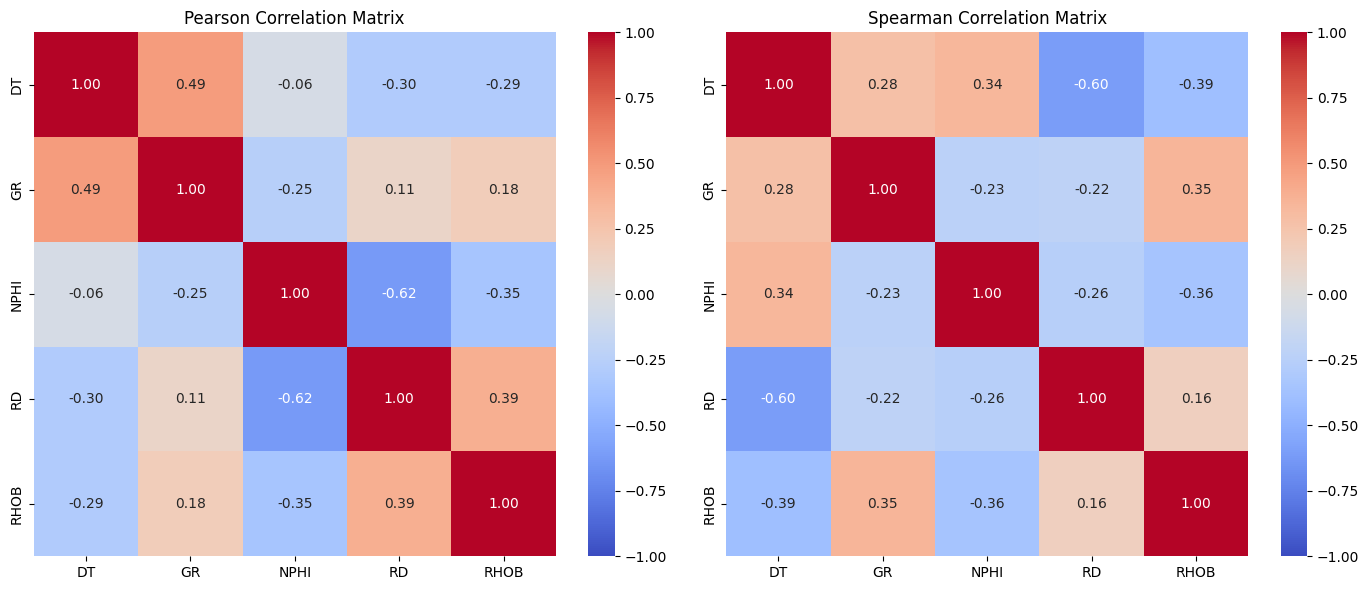

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Pearson Correlation Matrix
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')

# Plot Spearman Correlation Matrix
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix')

plt.tight_layout()
plt.show()

# Plotting The Logging Data along with their Interpretation

In [9]:
limits = {
    'DT': (3, 300),
    'GR': (0, 175),       
    'NPHI': (-0.15, 0.45),
    'RD': (0, 300),
    'RHOB' : (1.95, 2.95)
}

colors = {
    'DT': 'black',
    'GR': 'blue',       
    'NPHI': 'red',
    'RD': 'green',
    'RHOB' : 'brown'     
}

curves = ['DT', 'NPHI', 'GR', 'RD', 'RHOB']

Abbreviation = {
    'DT': 'Sonic Compress Wave Log',
    'GR': 'Gamma Log',        
    'NPHI': 'Neutron - Porosity Log',
    'RD': 'True Resistivity log',
    'RHOB' : 'Bulk Density Log'
}

In [24]:
import numpy as np


def plot_log_curves_with_limits(curve, curves, limits,point, depth_unit='m'):
    
    plt.figure(figsize=(10, 6))
    
    # Loop through each specified curve
    if curve in curves:
        if curve in las.keys():
            # Extract data
            depth = las.index
            data = np.array(las[curve].data)
            
            # Define limits
            if curve in limits:
                lower_limit, upper_limit = limits[curve]
                data = data.clip(lower_limit, upper_limit)
            
            # Plot the data
            plt.plot(data, depth, label=curve)
    
    # Customize plot
    plt.gca().invert_yaxis()  # Invert Y axis to match standard log plotting
    plt.xlabel('Value')
    plt.ylabel(f'Depth ({depth_unit})')
    plt.title(f'Log Curves: {Abbreviation[curve]}')

    plt.axhspan(point[0], point[1], color='green', alpha=0.3, label='Region of Intrest')

    plt.legend()
    plt.grid(True)
    plt.show()

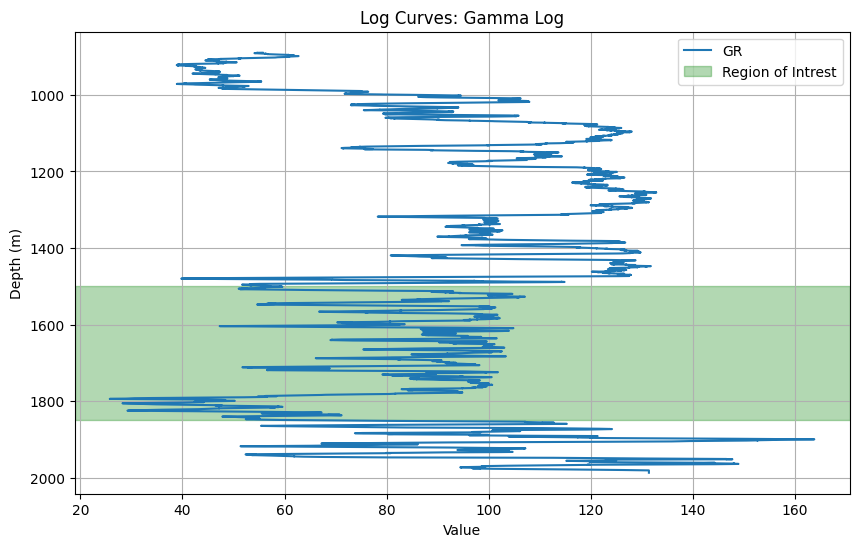

In [25]:
plot_log_curves_with_limits('GR', curves, limits, point = [1500, 1850], depth_unit='m')

above is the log data curve for gamma log, which mainly represent the presence of shale in the formation,
if the readings of gamma ray log is too large that means their is presence of shale rock. Thus for 1500 to 1850m we
can observe low gamma ray data which indicates presence of oil and gas reservoir rocks (sandstone, limestone.)

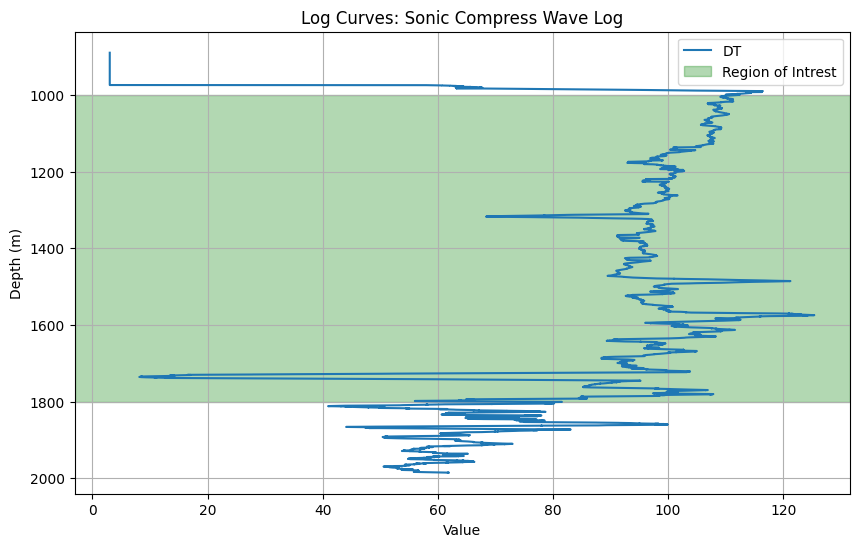

In [26]:
plot_log_curves_with_limits('DT', curves, limits, point = [1000, 1800])

Above is the log data of Sonic wave log ('DT'), which represent the time taken by the waves (compressional, shear, stonely)
to make a journey from the log tool to the reservoir and back to the log tool. And it mostly calcualte the primary porosity,
so we can see that almost from 1000 to 1800 the time taken is quite large thus indicating that it has low primary porosity. 
Though we can further interpret about the aboslute porosity using NPHI log.

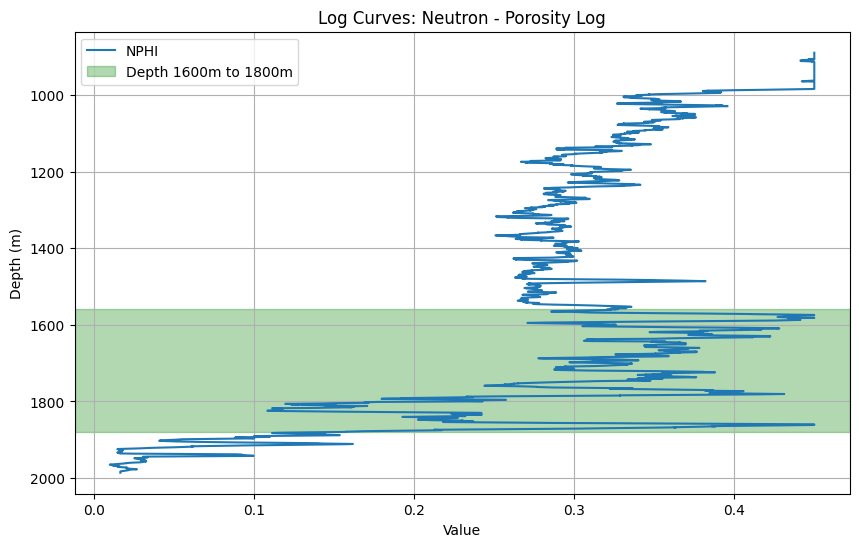

In [15]:
plot_log_curves_with_limits('NPHI', curves, limits, point = [1560, 1880])

So in the neutron porosity log data, between 1550 and 1880, we can see the porosity given is too large and is 
optimum for oil and gas phase flow. Which also gives us an idea that secondary porosity have a good influence on 
the absolute porosity

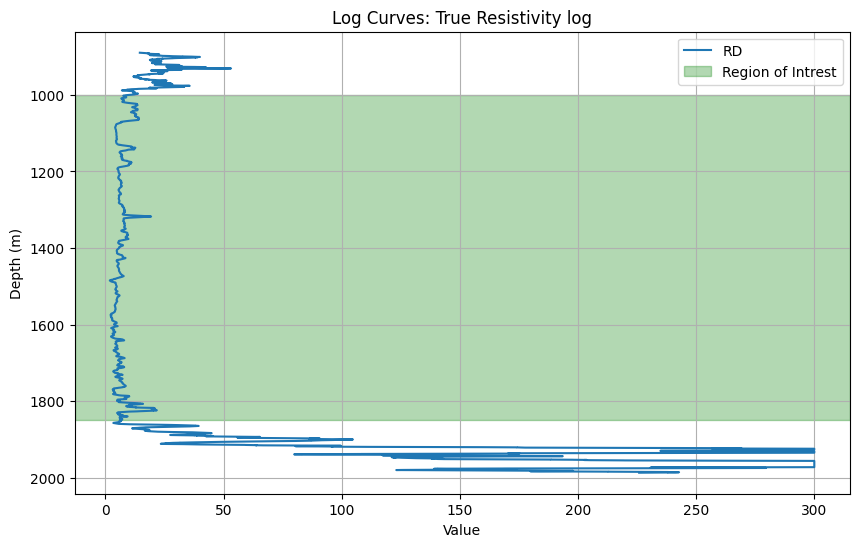

In [27]:
plot_log_curves_with_limits('RD', curves, limits, point = [1000, 1850])

Above is the deep resistivity curve, which represents the presence of which type of reservoir fluids in 
uninvaded zone, here its reading in most of the region is low resistivity, which indicates the presence of 
saline water deep in the reservoir.

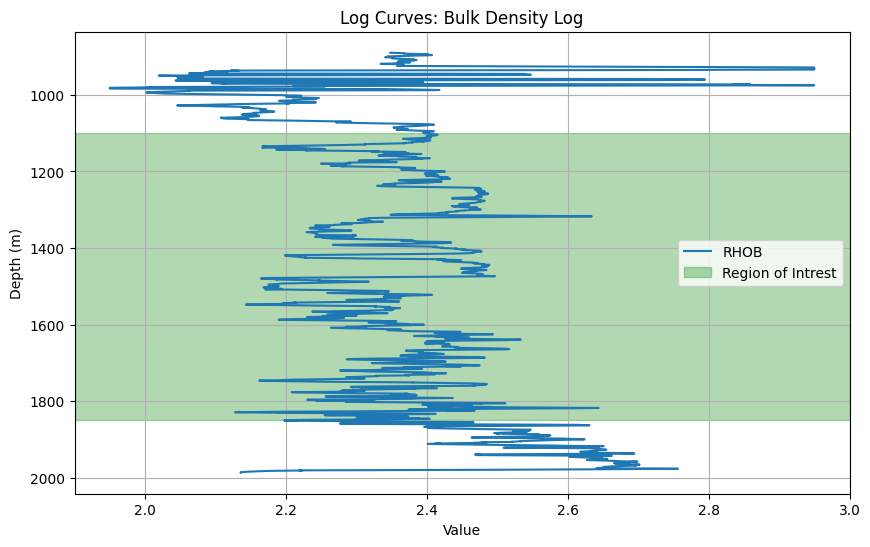

In [28]:
plot_log_curves_with_limits('RHOB', curves, limits, point = [1100, 1850])

Above is the last piece of log data that we have, which is bulk density log. It gives us the idea about the lithology
of the subsurface, whether it is sandstone, limestone or dolomite. So, we know from the research paper -
doi - https://doi.org/10.1533/9781845699567.7

that sandstone have bulk density of 2 - 2.6 (g/cc), limestone - 2.6 - 2.8 (g/cc), gravel - 2.6 - 2.9 (g/cc).
So between 1100 and 1850 m, we can see that it has an average of 2.45 of bulk density which repersents sandstone, 
which is a very suitable reservoir rock.

## With Above study, I conclude that in my point of view, 1600 - 1800 m is the most suitable region for the extraction of oil and gas.